## Requirements

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and clean dataset

In [60]:
dataset = pd.read_csv("data/cleaned_5250.csv")
missing_values_idx = dataset.isna().any(axis=1)
clean_dataset = dataset[~missing_values_idx]
clean_dataset.shape

(4765, 13)

Classifiication task: Predict the planet type

In [61]:
clean_dataset

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [62]:
num_obeservation = 4000
df = clean_dataset.iloc[range(num_obeservation)]
df = df.drop("name", axis=1)
df.head()

,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [ ]:
# mass transformation: The dataset contains a mass calculation based on two planets. We unify that into a single mass variable
jupiter_mass_kg = 1.898 * 10**27 #kg
jupiter_radius_km = 69911 #km
earth_mass_kg = 5.972 * 10**24
earth_radius_km = 6378
df["mass_wrt"] = np.where(df["mass_wrt"] == "Jupiter", jupiter_mass_kg, earth_mass_kg)
df["mass"] = np.multiply(df["mass_multiplier"], df["mass_wrt"])
df["radius_wrt"] = np.where(df["radius_wrt"] == "Jupiter", jupiter_radius_km, earth_radius_km)
df["radius"] = np.multiply(df["radius_multiplier"], df["radius_wrt"])
df = df.drop(["mass_wrt", "radius_wrt", "mass_multiplier", "radius_multiplier"], axis=1)
print(df, df.shape)

      distance  stellar_magnitude   planet_type  discovery_year  \
0        304.0            4.72307     Gas Giant            2007   
1        409.0            5.01300     Gas Giant            2009   
2        246.0            5.23133     Gas Giant            2008   
3         58.0            6.61935     Gas Giant            2002   
4         69.0            6.21500     Gas Giant            1996   
...        ...                ...           ...             ...   
4260    7849.0           16.06200  Neptune-like            2016   
4261    3197.0           14.67200  Neptune-like            2016   
4262    2942.0           15.57600  Neptune-like            2016   
4263    3601.0           15.42400  Neptune-like            2016   
4264    3081.0           13.69300  Neptune-like            2016   

      orbital_radius  orbital_period  eccentricity detection_method  \
0           1.290000        0.892539          0.23  Radial Velocity   
1           1.530000        1.400000          0.08  R

## Standardization

Note for us to the future: When we do training, make sure to first separate the training and test set, and do the standardization separately, so no info "leaks" from the test set into our training set.

In [65]:

planet_type = df["planet_type"]
encoded_df = df.copy()
#we encode the categorical variables, to make it digestable for the training stage later
encoded_df["detection_method"] = encoded_df["detection_method"].astype("category").cat.codes
encoded_df["planet_type"] = encoded_df["planet_type"].astype("category").cat.codes
encoded_df["discovery_year"] = encoded_df["discovery_year"].astype("category").cat.codes

#we have a separate df, so that the standardization is only done for the non-categorical variables
df_without_type = encoded_df.drop(["planet_type", "detection_method", "discovery_year"] , axis=1)

df_std = (df_without_type - np.mean(df_without_type, axis=0)) / np.std(df_without_type, axis=0)
print(np.std(df_std, axis=0))

#we add back everything
df_std["planet_type"] = encoded_df["planet_type"]
df_std["detection_method"] = encoded_df["detection_method"]
df_std["discovery_year"] = encoded_df["discovery_year"]
df_std

distance             1.0
stellar_magnitude    1.0
orbital_radius       1.0
orbital_period       1.0
eccentricity         1.0
mass                 1.0
radius               1.0
dtype: float64


,distance,stellar_magnitude,orbital_radius,orbital_period,eccentricity,mass,radius,planet_type,detection_method,discovery_year
0,-0.941502,-2.507892,-0.029399,-0.020411,1.082079,1.344301,1.380098,0,5,11
1,-0.876496,-2.416469,-0.027530,-0.020383,0.068518,0.995118,1.402200,0,5,13
2,-0.977410,-2.347623,-0.032981,-0.020433,-0.472049,0.250294,1.534811,0,5,12
3,-1.093801,-1.909940,-0.017851,-0.020190,2.028070,0.500477,1.468505,0,5,6
4,-1.086991,-2.037443,-0.026518,-0.020337,4.122764,0.023999,1.645320,0,5,1
...,...,...,...,...,...,...,...,...,...,...
4260,3.729620,1.067600,-0.038611,-0.020460,-0.472049,-0.107447,-0.456561,1,6,20
4261,0.849559,0.629293,-0.038655,-0.020460,-0.472049,-0.107518,-0.467612,1,6,20
4262,0.691688,0.914350,-0.038553,-0.020460,-0.472049,-0.107711,-0.502975,1,6,20
4263,1.099676,0.866420,-0.038458,-0.020460,-0.472049,-0.107518,-0.467612,1,6,20


In [66]:
planet_cats = df["planet_type"].astype("category")
print(planet_cats.cat.categories) 
detection_cats = df["detection_method"].astype("category")
print(detection_cats.cat.categories) 


Index(['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial'], dtype='object')
Index(['Astrometry', 'Direct Imaging', 'Disk Kinematics',
       'Eclipse Timing Variations', 'Orbital Brightness Modulation',
       'Radial Velocity', 'Transit', 'Transit Timing Variations'],
      dtype='object')


## Classification and regression problems

In [269]:
X = df_std.drop(["planet_type", "mass"], axis=1)
# X_no_outlier = X.drop([71, 78, 282], axis=0)
y_classification = df_std["planet_type"]
# y_classification = y_classification.drop([71, 78, 282], axis=0)
y_regression = df_std["mass"]
# X_no_outlier

# Apply PCA analysis

In [27]:
from sklearn.decomposition import PCA

For PCA, we need to drop categorical attributes like detection_method and discovery_year since it will have larger variance compared to the other normalized attributes.

In [284]:
pca = PCA()

X_pca = X.drop(["detection_method", "discovery_year"], axis=1)
cols_to_log = ["distance", "orbital_period", "orbital_radius", "radius"]
X_pca = X_pca[(X_pca[cols_to_log] >= 0).all(axis=1)]

for col in cols_to_log:
    X_pca[col] = np.log10(X_pca[col])

B = pca.fit_transform(X_pca)
V = pca.components_.T

rho = pca.explained_variance_ratio_

threshold = 0.90

plt.figure()
plt.plot(range(1, len(rho)+1), rho, "x-")
plt.plot(range(1, len(rho)+1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by PCA.

In [271]:
rho

array([0.41396762, 0.3266021 , 0.12017761, 0.08780162, 0.04578025,
       0.0056708 ])

remove the outlier PC1 less than -20, PC2 more than 7.5

In [273]:
outlier_idx = (B[:, 1] > 10)
print(np.where(B[:, 0] < -20))
print(np.where(B[:, 1] > 10))
out = [78, 428, 71, 282]
B = B[~outlier_idx]
y_classification = y_classification[~outlier_idx]

(array([], dtype=int64),)
(array([ 71,  78, 282]),)


distance             1.0
stellar_magnitude    1.0
orbital_radius       1.0
orbital_period       1.0
eccentricity         1.0
radius               1.0
dtype: float64


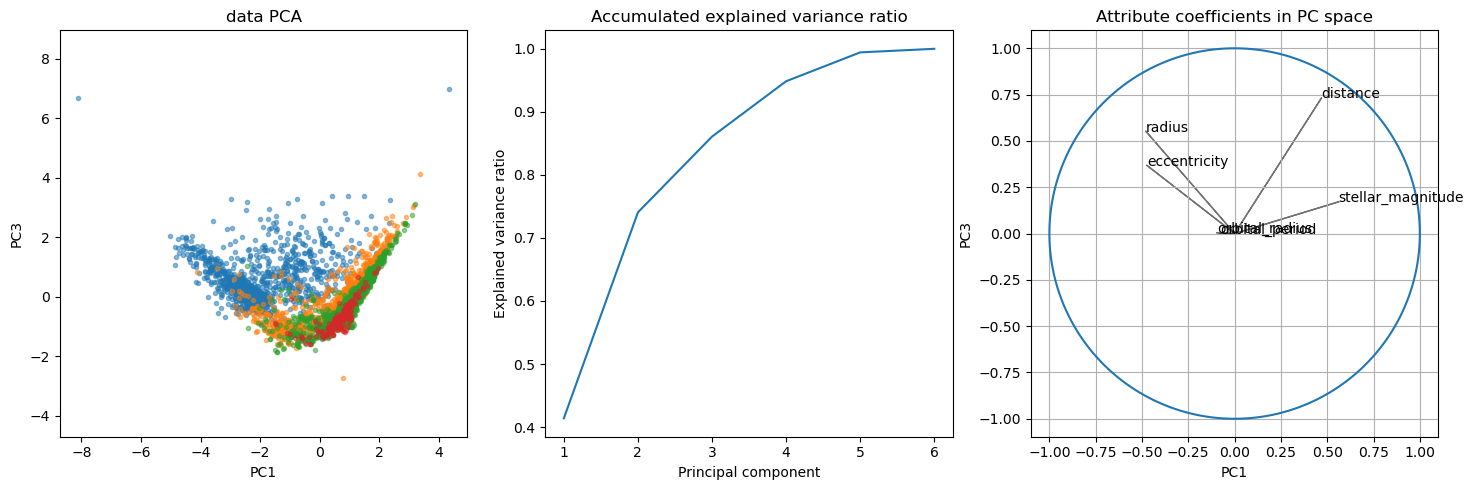

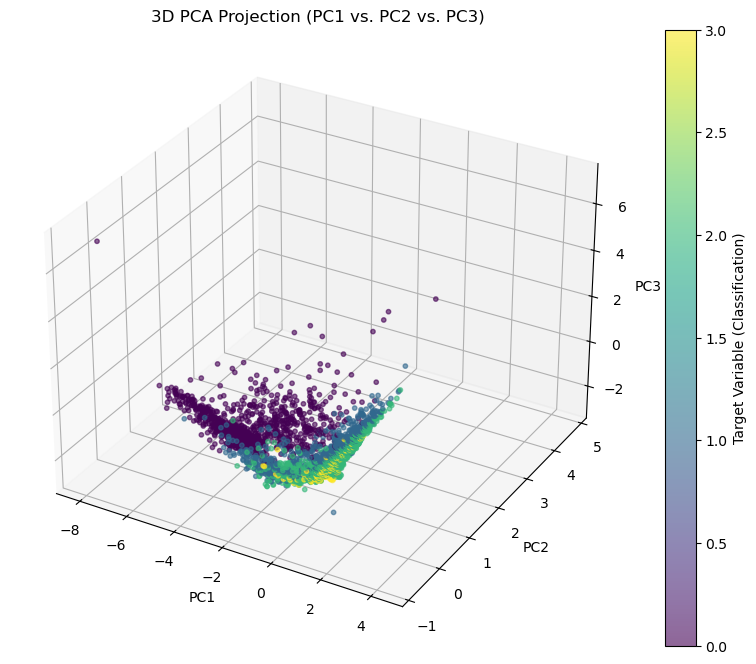

In [ ]:
PC_idxs = [0, 1]
unique_types = np.unique(y_classification)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
print(np.std(X_pca, axis=0))
axs[0].set_title("data PCA")
for p_type in unique_types:
    mask = (y_classification == p_type)
    axs[0].plot(B[mask, PC_idxs[0]], B[mask, PC_idxs[1]], ".", alpha=0.5)

axs[0].set_xlabel(f"PC{PC_idxs[0] + 1}")
axs[0].set_ylabel(f"PC{PC_idxs[1] + 1}")
axs[0].axis("equal")

axs[1].set_title("Accumulated explained variance ratio")
axs[1].plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum())
axs[1].set_xlabel("Principal component")
axs[1].set_ylabel("Explained variance ratio")

axs[2].set_title("Attribute coefficients in PC space")
for attr_idx, attr_name in enumerate(X_pca.columns):
    axs[2].arrow(0, 0, V[attr_idx, PC_idxs[0]], V[attr_idx, PC_idxs[1]], color='black', alpha=0.5)
    axs[2].text(V[attr_idx, PC_idxs[0]], V[attr_idx, PC_idxs[1]], attr_name)
    
axs[2].set_xlim([-1, 1])
axs[2].set_ylim([-1, 1])
axs[2].set_xlabel(f"PC{PC_idxs[0] + 1}")
axs[2].set_ylabel(f"PC{PC_idxs[1] + 1}")
axs[2].grid()
# Add a unit circle
axs[2].plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
axs[2].axis("equal")
plt.tight_layout()
plt.show()

fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')

scatter_3d = ax_3d.scatter(
    B[:, 0],
    B[:, 1],
    B[:, 2],
    c=y_classification,
    cmap='viridis',
    marker='o',
    s=10,
    alpha=0.6
)

for p_type in unique_types:
    mask = (y_classification == p_type)

ax_3d.set_title('3D PCA Projection (PC1 vs. PC2 vs. PC3)')
ax_3d.set_xlabel(f"PC{0 + 1}")
ax_3d.set_ylabel(f"PC{1 + 1}")
ax_3d.set_zlabel(f"PC{2 + 1}")

fig_3d.colorbar(scatter_3d, ax=ax_3d, label='Target Variable (Classification)')

plt.show()

Can be seen that 85 percent of the total variance lies in the first three PC.

## Histogram

In [14]:
for i in range(9):
    plt.figure(figsize=(10,6))
    plt.hist(X_classification.iloc[:, i], color=f"C{i}", bins=200, edgecolor='black')
    plt.title(X_classification.columns[i])
    plt.xlabel("Value")
    plt.ylabel("Frequency")


NameError: name 'X_classification' is not defined

<Figure size 1000x600 with 0 Axes>

## Plotting attributes

NameError: name 'X_classification' is not defined

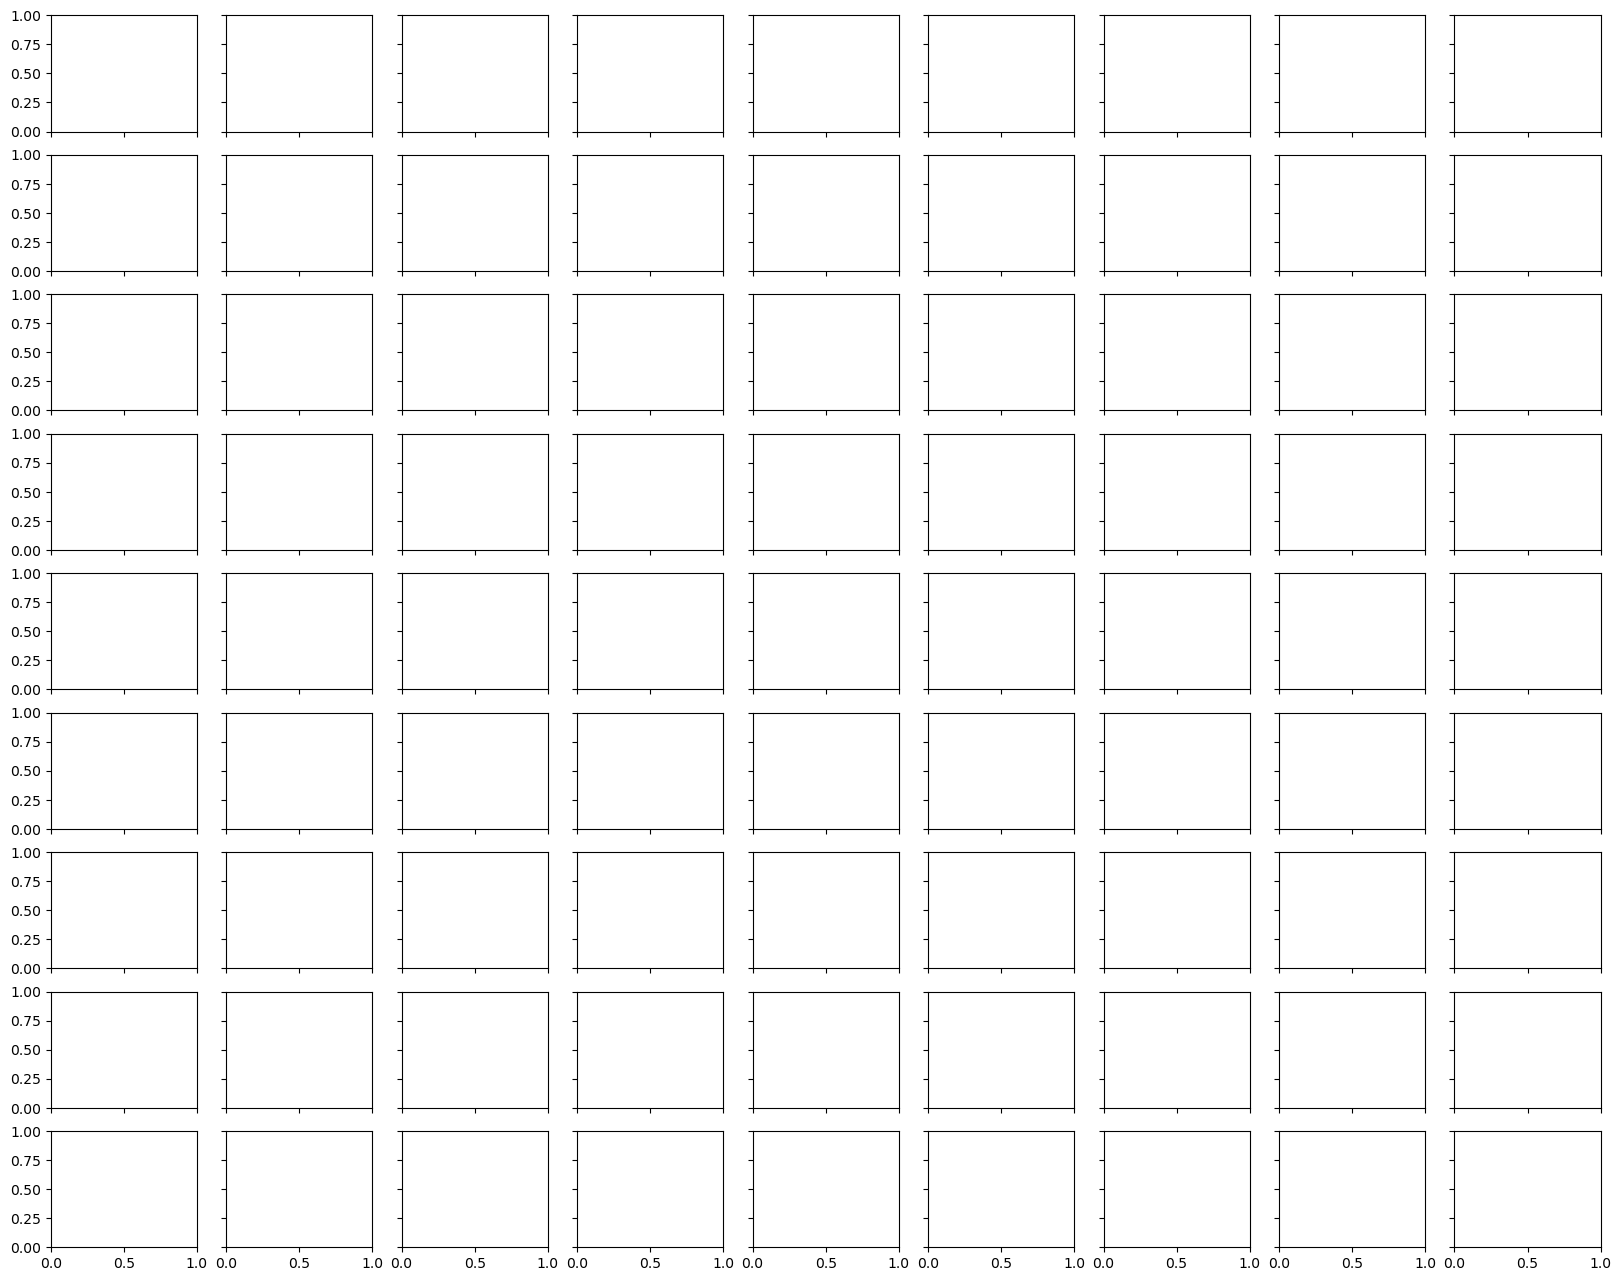

In [169]:
fig, axs = plt.subplots(9, 9, figsize=(20, 16), sharex='col', sharey='row')
for i in range(9):
    for j in range(9):
        for type in y_classification.unique():
            mask = (y_classification == type)
            axs[j, i].scatter(
                x=X_classification[mask][X_classification.columns[j]],
                y=X_classification[mask][X_classification.columns[i]],
                label=type,
                alpha=0.5
            )

plt.show()

TODO:

PCA analysis

KNN - maybe?

Describe each attribute. This is more documentation and reasoning why we chose the ones we have now

correlation pairs between attributes

Few other visualizations maybe based on what other people tried also in our references, and some own experiments


Important: For standardization. We should standardize before the PCA and the pair plots, but don't standardize for the raw data visualization in the beginning.
